In [154]:
#importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns
import sqlite3
import scipy.stats as stats

In [155]:
#leitura do arquivo CSV
df = pd.read_csv("nba-player-data.csv")

In [156]:
df.head(10)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,...,.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,...,.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,...,.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
3,2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,...,.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
4,3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,...,.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8
5,3,Ochai Agbaji,SG,23,UTA,51,10,19.7,2.1,4.9,...,.750,0.7,1.8,2.5,0.9,0.5,0.6,0.7,1.3,5.4
6,3,Ochai Agbaji,SG,23,TOR,27,18,23.6,2.7,6.8,...,.611,1.4,1.9,3.3,1.3,0.7,0.6,1.1,1.9,6.7
7,4,Santi Aldama,PF,23,MEM,61,35,26.5,4.0,9.3,...,.621,1.2,4.6,5.8,2.3,0.7,0.9,1.1,1.5,10.7
8,5,Nickeil Alexander-Walker,SG,25,MIN,82,20,23.4,2.9,6.6,...,.800,0.4,1.6,2.0,2.5,0.8,0.5,0.9,1.7,8.0
9,6,Grayson Allen,SG,28,PHO,75,74,33.5,4.5,9.1,...,.878,0.6,3.3,3.9,3.0,0.9,0.6,1.3,2.1,13.5


In [157]:
#quantidades de linhas e colunas
df.shape

(736, 30)

In [158]:
df_backup = df.copy()

In [159]:
#mostrando os nulos em cada coluna 
nulos_por_coluna = df.isnull().sum()
print(nulos_por_coluna)

Rk         0
Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        8
3P         0
3PA        0
3P%       46
2P         0
2PA        0
2P%       13
eFG%       8
FT         0
FTA        0
FT%       59
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
dtype: int64


In [160]:
#mostrnado os nulos por linhas
nulos_por_linhas = df.isnull().sum(axis=1)
print(nulos_por_linhas)

0      0
1      0
2      0
3      0
4      0
      ..
731    0
732    0
733    0
734    0
735    1
Length: 736, dtype: int64


In [161]:
#remover linhas duplicadas
df = df.drop_duplicates()

In [162]:
df.columns


Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [163]:
#renomear as colunas para PT
df.rename(columns = {
    'Rk': 'Valor', 
    'Player':'Jogador',
    'Pos': 'Posicao',
    'Age': 'Idade',
    'Tm' : 'Times',
    'G' : 'Jogo'

}, inplace=True)


In [164]:
#salve no csv novo arquivo 
df.to_csv('nba-player-data-novo.csv', index=False)

In [165]:
#conversão da tabela jogador para numerica
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['ID_Jogador'] = le.fit_transform(df['Jogador'])

In [166]:
#conversão da tabela idade para numerica
df['Idade'] = pd.to_numeric(df['Idade'], errors='coerce')


# Análises 

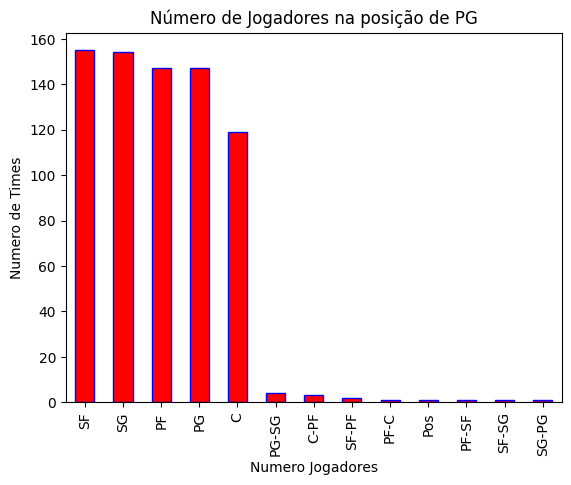

In [167]:
#Quantos jogadores são Point Guard (PG): Armador?
numero_pg = df['Posicao'].value_counts()
#criação do grafico
numero_pg.plot(kind="bar", edgecolor="blue", color="red")
#configurações
plt.xlabel('Numero Jogadores')
plt.ylabel('Numero de Times')
plt.title("Número de Jogadores na posição de PG")
plt.show()

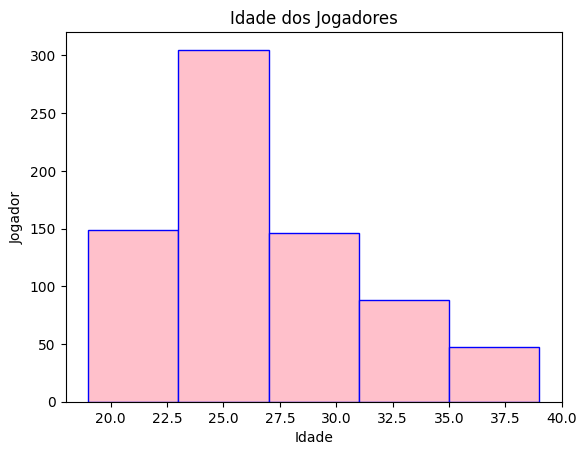

In [168]:
#Idades dos jogadores
df["Idade"].plot.hist(bins=5, edgecolor= "blue", color="pink")

plt.xlabel("Idade")
plt.ylabel("Jogador")
plt.title("Idade dos Jogadores")

plt.show()

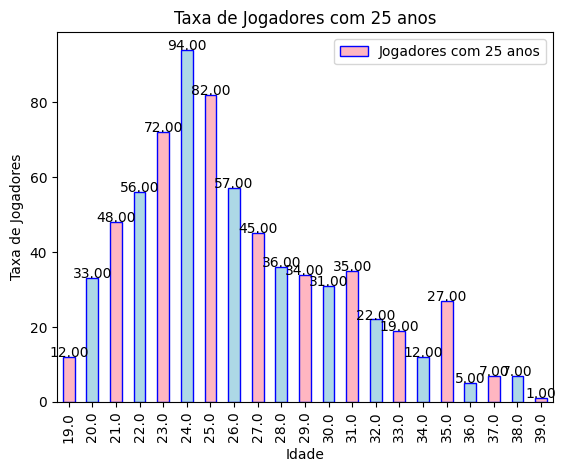

In [169]:
# Qual a taxa dos jogadores com 25 anos? 
taxa_jogador = df.groupby("Idade")["Jogador"].size()
#cores para barras
cores = ["lightpink","lightblue"]
# plotagem
barras = taxa_jogador.plot.bar(edgecolor = "blue", color= cores)
# os rotulos
plt.xlabel("Idade")
plt.ylabel("Taxa de Jogadores")
plt.title("Taxa de Jogadores com 25 anos")
#adicionar legendas
plt.legend(["Jogadores com 25 anos"])
#adicionar rotulos nos graficos
for i, v in enumerate(taxa_jogador):
    barras.text(i, v + 0.01, f'{v:.2f}', color = 'black', ha = 'center')
plt.show()

Test T Melhor Time
Estatistica T : nan
Valor P: nan


C:\Users\Colaborador\AppData\Local\Temp\ipykernel_14644\2359973475.py:8: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  estatistica_t, valor_p = ttest_ind(melhor_time, pior_time)
C:\Users\Colaborador\AppData\Local\Temp\ipykernel_14644\2359973475.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


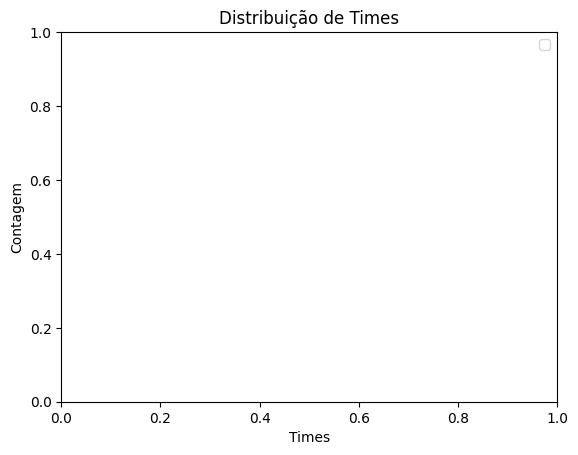

Não rejeitamos a hipotese nula


In [172]:
#amostras

melhor_time = df[df['Times']==1]['Jogo'].dropna()
pior_time = df[df['Times']==0]['Jogo'].dropna()

#teste t 

estatistica_t, valor_p = ttest_ind(melhor_time, pior_time)

print("Test T Melhor Time")
print(f"Estatistica T : {estatistica_t}")
print(f"Valor P: {valor_p}")

#grafico

sns.histplot(melhor_time,color= 'blue', label='O melhor',bins=20)
sns.histplot(pior_time,color= 'red', label='O pior',bins=20)

#Rotulo

plt.legend()
plt.title("Distribuição de Times")
plt.xlabel("Times")
plt.ylabel ("Contagem")
plt.show()

#interpretação 

if valor_p < 0.10:
    print("Rejeitamos a hipotese nula")
else:
    print("Não rejeitamos a hipotese nula")

In [174]:
baby_df = df.sample(50)

In [175]:
baby_df.head(3)

,Valor,Jogador,Posicao,Idade,Times,Jogo,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ID_Jogador
216,161,Daniel Gafford,C-PF,25.0,TOT,74,66,24.5,4.7,6.5,...,2.6,5.0,7.6,1.6,0.9,2.1,1.0,3.1,11.0,110
143,107,Ricky Council IV,SG,22.0,PHI,32,0,9.0,1.7,3.5,...,0.4,1.0,1.4,0.5,0.3,0.0,0.2,0.5,5.4,478
200,151,Simone Fontecchio,SF,28.0,TOT,66,43,24.9,3.8,8.3,...,1.0,2.8,3.7,1.5,0.7,0.3,1.0,1.7,10.5,506


In [176]:
#SQL
conn = sqlite3.connect(':memory:')
baby_df.to_sql('baby_df',conn, index = False, if_exists='replace')

query_sql = """
SELECT Jogador, COUNT(Times) AS Contagem
FROM baby_df
GROUP BY Jogador;
"""

contagem_por_jogador =pd.read_sql_query(query_sql,conn)
print (contagem_por_jogador)
#fechar conexão
conn.close()

               Jogador  Contagem
0         Adam Flagler         1
1           Al Horford         1
2      Anfernee Simons         1
3      Bismack Biyombo         1
4     Bojan Bogdanović         1
5   Brandon Boston Jr.         1
6          Bruce Brown         1
7      Cade Cunningham         1
8          Cory Joseph         1
9       Daniel Gafford         1
10      David Duke Jr.         1
11         David Roddy         1
12           Dean Wade         1
13     Dejounte Murray         1
14      Gordon Hayward         1
15         Harry Giles         1
16         Ivica Zubac         1
17             JT Thor         1
18       Jacob Gilyard         2
19      Jaden Springer         1
20        Jake LaRavia         1
21         Jalen Duren         1
22      Jalen Williams         1
23          Jamal Cain         1
24       James Johnson         1
25       Jaylen Nowell         1
26       Jeremy Sochan         1
27      Jordan Goodwin         1
28     Josh Richardson         1
29   Julia

In [177]:
#PANDAS
contagem_por_jogador = baby_df ['Jogador'].value_counts()
contagem_por_jogador.columns = ['Jogador', 'contagem']
print(contagem_por_jogador)

Jogador
Jacob Gilyard         2
Daniel Gafford        1
Ricky Council IV      1
Thomas Bryant         1
Simone Fontecchio     1
Spencer Dinwiddie     1
Jalen Duren           1
Cory Joseph           1
Adam Flagler          1
Julian Champagnie     1
Julian Phillips       1
Karl-Anthony Towns    1
JT Thor               1
Robert Covington      1
Rui Hachimura         1
Ivica Zubac           1
Otto Porter Jr.       1
Josh Richardson       1
Bruce Brown           1
Moses Brown           1
Malik Monk            1
Ty Jerome             1
Jordan Goodwin        1
Dejounte Murray       1
David Roddy           1
Troy Brown Jr.        1
Jake LaRavia          1
Kyle Kuzma            1
Jalen Williams        1
Bismack Biyombo       1
David Duke Jr.        1
Marvin Bagley III     1
Quentin Grimes        1
Harry Giles           1
Lamar Stevens         1
Nick Smith Jr.        1
Jamal Cain            1
Jaden Springer        1
Gordon Hayward        1
Al Horford            1
Brandon Boston Jr.    1
James Jo